# Spike Ball Tournament Simulations

Import Necessary Packages

In [4]:
import pandas as pd
import numpy as np
import math
import random as random
import itertools as itertools
import copy

In [6]:
corrections_df = pd.read_csv('../data/name_corrections.csv')
corrections_dict = dict(zip(corrections_df['OldName'].str.strip().str.upper(), corrections_df['NewName'].str.strip()))
# Function to correct player names
def correct_name(name):
    return corrections_dict.get(name.strip().upper(), name.strip())

def correct_names(df):# Apply corrections to Player1 and Player2 columns
    df['Player1'] = df['Player1'].apply(correct_name)
    df['Player2'] = df['Player2'].apply(correct_name)
    return df


### Read in team data 

In [30]:
open_teams=pd.read_csv("../data/south25_open.csv")
open_teams=correct_names(open_teams)
open_teams

,Team,Player1,Player2,P1 Rating,P2 Rating,Team Rating
0,KAB Package D,Owen Bass,Thomas Hoffman,NaN,NaN,NaN
1,Dopplebangers,Isaac Mixon,Jake Dooley,NaN,NaN,NaN
2,Pecan Pralines,Aleks Essen,Jackson Wood,NaN,NaN,NaN
3,ten eye c boys,Bradley Clark,Sean Caufield,NaN,NaN,NaN
4,Walmart Creamy,Jeremy Lee,Colton Olvey,NaN,NaN,NaN
5,Biggie’s Step-Dads,CLIFFORD LEVEQUE,Nick Evanko,NaN,NaN,NaN
6,LL Cheezin,Matt Spolarich,Mike Garrett,NaN,NaN,NaN
7,Dethrone,Ryan Fernandez,Patricio Duran,NaN,NaN,NaN
8,J.A.R.V.I.S.,Connor Nelson,Josh Fragiacomo,NaN,NaN,NaN
9,Absolute Freaks,Dan Abrams,PAQ CLIFFORD,NaN,NaN,NaN


In [8]:
def get_rating_player(player,df,tourney): # From MM
    player=player.upper()
    filt_df =df[(df["Name"]==player)&(df["tourney"]==tourney)]
    if len(filt_df)>0:
        return (df[(df["Name"]==player)&(df["tourney"]==tourney)].reset_index(drop=True)["score"][0]* 10 +100).round(2)
    else:
        return 100
    
def get_rating_player(player,df,tourney,default=800):
    player=player.upper()
    filt_df =df[(df["name"]==player)&(df["Tournament"]==tourney)]
    if len(filt_df)>0:
        return (df[(df["name"]==player)&(df["Tournament"]==tourney)].reset_index(drop=True)["elo"][0]).round(2)
    else:
        return default

def get_ratings_all(teams,df,tourney,default=800):
    teams["P1 Rating"]=[get_rating_player(x,df,tourney,default) for x in teams["Player1"]]
    teams["P2 Rating"]=[get_rating_player(x,df,tourney,default) for x in teams["Player2"]]
    teams["Team Rating"]= teams[["P1 Rating", "P2 Rating"]].mean(axis=1).round(2)
    return teams.sort_values(by="Team Rating", ascending=False).reset_index(drop=True)





In [31]:
#open_teams=pd.read_csv("../data/southeast25_open.csv").sort_values(by="Team Rating", ascending=False).reset_index(drop=True)
open_rating=pd.read_csv("../data/test_final_players_open_2025-04-25.csv")
open_teams=get_ratings_all(open_teams,open_rating,"PHOENIX-SECTIONAL-25")
open_teams.to_csv("../data/south25_open.csv",index=False)
open_teams

,Team,Player1,Player2,P1 Rating,P2 Rating,Team Rating
0,J.A.R.V.I.S.,Connor Nelson,Josh Fragiacomo,2094.25,2245.38,2169.82
1,Absolute Freaks,Dan Abrams,PAQ CLIFFORD,2156.00,1915.79,2035.90
2,Snarl,Ben Savage,Dawson Morgan,1873.26,2014.13,1943.70
3,Drawing Dead,Kieran Rose,Tyler Fernandez,1964.39,1827.61,1896.00
4,LL Cheezin,Matt Spolarich,Mike Garrett,1791.43,1992.64,1892.04
5,NEM Seazonal,Zach Snover,Jacob Summers,1640.51,2083.36,1861.94
6,Clip Farm,Polk Denmark,Andrew Greer,1894.50,1659.19,1776.84
7,Biggie’s Step-Dads,CLIFFORD LEVEQUE,Nick Evanko,1776.76,1761.02,1768.89
8,KAB Package D,Owen Bass,Thomas Hoffman,1554.84,1887.37,1721.10
9,Party Fowl,Kyle Fowler,Cole Maddox,1786.68,1547.86,1667.27


In [23]:
#womens_teams=pd.read_csv("../data/southeast25_womens.csv").sort_values(by="Team Rating", ascending=False).reset_index(drop=True)
womens_teams=pd.read_csv("../data/south25_women.csv")
womens_teams=correct_names(womens_teams)
womens_rating=pd.read_csv("../data/test_final_players_womens_2025-04-24.csv")
womens_teams=get_ratings_all(womens_teams,womens_rating,"USAR25SOUTHEAST",default=1400)
womens_teams.to_csv("../data/south25_women.csv",index=False)
womens_teams

,Team,Player1,Player2,P1 Rating,P2 Rating,Team Rating
0,don't give a gaf,Joanna Gould,Katheleen Phan,2311.46,2665.29,2488.38
1,tbd!,Malia Wanderer,Meagan Bown,2720.09,1861.57,2290.83
2,heads carolina tails california,Stef Ding,Kalin Morgan,2080.91,2451.25,2266.08
3,French Bread,JULIA TIMAN,Rachel Dolan,2480.29,1929.59,2204.94
4,Splash Bros,Maddie Huffstetler,Christina Nikas,2036.19,1785.77,1910.98
5,Carvalski,Laura Carver,Summer Kowalski,1400.00,1400.00,1400.00


In [25]:
#contend_teams=pd.read_csv("../data/southeast25_contend.csv").sort_values(by="Team Rating", ascending=False).reset_index(drop=True)
contend_teams=pd.read_csv("../data/south25_contend.csv")
contend_teams=correct_names(contend_teams)
contend_teams=get_ratings_all(contend_teams,open_rating,"PHOENIX-SECTIONAL-25")
contend_teams.to_csv("../data/south25_contend.csv",index=False)
contend_teams

,Team,Player1,Player2,P1 Rating,P2 Rating,Team Rating
0,Dumb n’ dumber,Jose Knight,Sam Aven,1294.11,1134.01,1214.06
1,Executive Order,Eric Baldwin,Cole Solomon,1105.29,1232.67,1168.98
2,Presidential Industry,Austin Niles,Hampton Chappell,1027.89,1207.84,1117.86
3,Overdue,Caleb Isbell,Jacob Eakin,1037.82,1048.07,1042.94
4,Lava Chicken,Gabriel Skaggs,Zach Carver,800.00,997.04,898.52
5,Garret/Derrick,Garret Chaffins,Derrick Zehr,889.05,800.00,844.52


In [26]:
# For ease of input I created a csv with the teams and thier ratings as an average of the two player

#Create a team dictionary out of the teams playing
team_dict=dict(zip(open_teams["Team"],open_teams["Team Rating"]))
team_dict_w=dict(zip(womens_teams["Team"],womens_teams["Team Rating"]))
team_dict_c=dict(zip(contend_teams["Team"],contend_teams["Team Rating"]))
team_dict_c

{'Dumb n’ dumber': 1214.06,
 'Executive Order': 1168.98,
 'Presidential Industry': 1117.86,
 'Overdue': 1042.94,
 'Lava Chicken': 898.52,
 'Garret/Derrick': 844.52}

### Set Up important functions

#### Functions you can/should change

In [14]:
# This sets up the seeding for the bracket portion of the tournament
# You can add the logic here for any custom seeding you might want
bracket_keys={
    "Open":["A1","C4","B2","D3","D1","A4","C2","B3","B1","D4","A2","C3","C1","B4","A3","D2"],
    "A":["A1","BYE","B3","C3","A2","BYE","C2","B4","B1","BYE","A3","C4","C1","BYE","B2","A4"],
    "B":["A1","BYE","B3","C3","B2","BYE","C2","A4","B1","BYE","A3","C4","C1","BYE","A2","B4"],
    "C":["A1","BYE","B3","C3","C2","BYE","B2","A4","B1","BYE","A3","C4","C1","BYE","A2","B4"],
    "8":['1', '8', '4', '5', '2', '7', '3', '6'],
    "16":['1', '16', '8', '9', '4', '13', '5', '12', '2', '15', '7', '10', '3', '14', '6', '11'],
    "32":['1', '32', '16', '17', '8', '25', '9', '24', '4', '29', '13', '20', '5', '28', '12', '21', '2', '31', '15', '18', '7', '26', '10', '23', '3', '30', '14', '19', '6', '27', '11', '22'],
    "64": ['1', '64', '32', '33', '16', '49', '17', '48', '8', '57', '25', '40', '9', '56', '24', '41', '4', '61', '29', '36', '13', '52', '20', '45', '5', '60', '28', '37', '12', '53', '21', '44', '2', '63', '31', '34', '15', '50', '18', '47', '7', '58', '26', '39', '10', '55', '23', '42', '3', '62', '30', '35', '14', '51', '19', '46', '6', '59', '27', '38', '11', '54', '22', '43'],
    "Power_1":["A1","BYE","B2","C3","A4","BYE","B1","C4","A2","BYE","C2","B3","A3","BYE","C1","B4"],
    "Power_8":["A1","B4","A4","B1","A2","B3","A3","B2"]
}


# This is used to calculated the probablity of team two winning the match based on out rating system
# You should update to be the function on your elo system
def calc_prob(score1,score2):
    #Probablity team 2 wins
    return 1.0 * 1.0 / (1 + 1.0 * math.pow(10, 1.0 * (score1 - score2) / 400))

def create_pools(dict,num_pools):
    teams = list(dict.keys())
    final=[[] for _ in range(num_pools)]
    max_number_teams=math.ceil(len(teams)/num_pools)
    order=([x for x in range(num_pools)]+([x for x in range(num_pools)][::-1]))*math.ceil(max_number_teams/2)
    while len(teams)>0:
        final[order.pop(0)].append(teams.pop(0))
    return(final)
        
 
    

#### Functions that run indvidual portions

In [13]:
# This is the function that plays a game between two teams and returns a randomly generated winner based on the teams rating
def play_game(team1,team2,team_dict=team_dict):
    cutoff=calc_prob(team_dict[team1],team_dict[team2])
    #Generates a random number between 0 and 1
    result=random.uniform(0, 1)
   
    #If value is above cutoff team 1 wins
    if result>cutoff:
        winner=team1
        loser=team2
    #If not team 2 wins
    else:
        winner=team2
        loser=team1


    return winner


# This does the same thing but with a three game series 
def best_of_3(team_1,team_2,td=team_dict):
    w_d={
            team_1:0,
            team_2:0
        }
    while ((w_d[team_1]<2)&(w_d[team_2]<2)):
        winner=play_game(team_1,team_2,team_dict=td)
        w_d[winner]+=1
    if w_d[team_1]==2:
        winner=team_1
    else:
        winner=team_2
    return winner



## Setting up Important Classes

In [15]:
# Creating a Pool class that plays out a pool This current iteration is set up to play two games only (STS/USAR Format but could be modifed)
class Pool():
    """
    Represents a pool in a tournament.

    Attributes:
    - teams (list): List of team names in the pool.
    - team_dict (dict): Dictionary mapping team names to their ratings.
    - stand (pandas.DataFrame): DataFrame to store pool standings.
    """
    
    def __init__(self,teams,team_dict_p,hot=False,k=50):
        """
        Initializes a Pool object.

        Parameters:
        - teams (list): List of team names in the pool.
        - team_dict (dict): Dictionary mapping team names to their ratings.
        """
        self.teams=teams
        self.team_dict=team_dict_p
        self.stand=pd.DataFrame({"Team":teams,"RD":[0.00]*len(teams),"GW":[0]*len(teams),"GL":[0]*len(teams),"Rating":[self.team_dict[team] for team in teams ]})
        self.hot=hot
        self.k=k

    def _pool_match(self,team_1,team_2,i1,i2):
        """
        Simulates a match between two teams in the pool and updates standings.

        Parameters:
        - team_1 (str): Name of the first team.
        - team_2 (str): Name of the second team.
        - i1 (int): Index of the first team in the standings DataFrame.
        - i2 (int): Index of the second team in the standings DataFrame.
        """
        games=0
        self.stand.at[i1,"RD"]+=self.team_dict[team_1]-self.team_dict[team_2]
        self.stand.at[i2,"RD"]+=self.team_dict[team_2]-self.team_dict[team_1]
        
        #Here is where you could modify to only play one game or use the best of 3 function to play a seris
        while (games<2):
            winner =self.play_game(team_1,team_2)
            if winner==team_1:
                wi=i1
                li=i2
            else:
                wi=i2
                li=i1
            self.stand.at[wi,"GW"]+=1
            self.stand.at[li,"GL"]+=1
            games += 1
    
    def sim(self):
        """Simulates all matches within the pool."""
        #crate a list of all possible matchs
        combinations = list(itertools.combinations(range(0,len(self.stand)), 2))
        
        for combo in combinations:
            # Play all possible matches
            self._pool_match(self.teams[combo[0]],self.teams[combo[1]],combo[0],combo[1])
            
        # self.pool_match(self.teams[0],self.teams[3],0,3,td)
        # self.pool_match(self.teams[1],self.teams[2],1,2,td)
        # self.pool_match(self.teams[0],self.teams[1],0,1,td)
        # self.pool_match(self.teams[2],self.teams[3],2,3,td)
        # self.pool_match(self.teams[0],self.teams[2],0,2,td)
        # self.pool_match(self.teams[1],self.teams[3],1,3,td)
    #insert tiebrakers
        
        #["Team","MW","ML","GW","GL","Rating"]
        self.stand["RD"]=self.stand["RD"]/len(self.stand)
        self.stand=self.stand.sort_values(["GL","RD"],ascending=[True,False]).reset_index(drop=True)
        #print(self.team_dict)
        #self.stand["Rating"]=[team_dict[team] for team in self.stand["Team"] ]
        
    def give_seeds(self,tag):
        """
        Generates seedings for the pool. This is used only for slotted bracket tournaments

        Parameters:
        - tag (str): A tag to identify the seedings.

        Returns:
        - dict: A dictionary mapping seed identifiers to team names.
        """
        return (dict(zip([tag+"1",tag+"2",tag+"3",tag+"4"], self.stand["Team"])))


    # This is the function that plays a game between two teams and returns a randomly generated winner based on the teams rating
    def play_game(self,team1,team2):
        cutoff=calc_prob(self.team_dict[team1],self.team_dict[team2])
        #Generates a random number between 0 and 1
        result=random.uniform(0, 1)
       
        #If value is above cutoff team 1 wins
        if result>cutoff:
            winner=team1
            loser=team2
            if self.hot==True:
                self.team_dict[team1]+=self.k * (1-(1-cutoff))
                self.team_dict[team2]+=self.k * (0-cutoff)
        #If not team 2 wins
        else:
            winner=team2
            loser=team1
            if self.hot==True:
                self.team_dict[team1]+=self.k * (0-(1-cutoff))
                self.team_dict[team2]+=self.k * (1-cutoff)
        
    
        return winner
    
    
    # This does the same thing but with a three game series 
    def best_of_3(self,team_1,team_2):
        w_d={
                team_1:0,
                team_2:0
            }
        while ((w_d[team_1]<2)&(w_d[team_2]<2)):
            winner=self.play_game(team_1,team_2,team_dict=td)
            w_d[winner]+=1
        if w_d[team_1]==2:
            winner=team_1
        else:
            winner=team_2
        return winner
        
class Simulator():
    """
    Simulates a tournament.

    Attributes:
    - pools (list): List of pools in the tournament.
    - team_dict (dict): Dictionary mapping team names to their ratings.
    """
    def __init__(self,pools,team_dict,hot=False,k=50,slotted=False,slotted_key=""):
        """
        Initializes a Simulator object.

        Parameters:
        - pools (list): List of pools in the tournament.
        - team_dict (dict): Dictionary mapping team names to their ratings.
        """
        self.pools=pools
        self.team_dict=copy.deepcopy(team_dict)
        self.hot=hot
        self.k=k
        self.slotted=slotted
        self.slotted_key=slotted_key
        if self.hot == True:
            self.team_dict_o=copy.deepcopy(team_dict)
            self.team_dict_new=[]
        

# Helper function to simulate a pool
    def _sim_pool(self,pool):
        """
        Simulates matches within a pool and returns standings.

        Parameters:
        - pool (list): List of teams in the pool.

        Returns:
        - pandas.DataFrame: Standings DataFrame for the pool.
        """
        pool_obj=Pool(pool,self.team_dict,self.hot,self.k)
        pool_obj.sim()
        if self.slotted==False:
            return(pool_obj.stand)
        else:
            return(pool_obj)
    
    # This was set up to determine things for a seeded bracket
    def _find_highest(self,rowA,rowB,rowC,team_dict_w):
        """
        Finds the team with the highest performance among three teams. THIS IS USED ONLY FOR SLOTTED BRACKETS WITH 3 pools

        Parameters:
        - rowA (pandas.Series): Standing of team A.
        - rowB (pandas.Series): Standing of team B.
        - rowC (pandas.Series): Standing of team C.
        - team_dict_w (dict): Dictionary mapping team names to their ratings.

        Returns:
        - str: Identifier of the team with the highest performance.
        """
        if (rowA["ML"]> rowB["ML"]) & (rowA["ML"]> rowC["ML"]):
            return "A"
        elif (rowB["ML"]> rowA["ML"]) & (rowB["ML"]> rowC["ML"]):
            return "B"
        elif (rowC["ML"]> rowA["ML"]) & (rowC["ML"]> rowB["ML"]):
            return "C"
        elif (rowA["GL"]> rowB["GL"]) & (rowA["GL"]> rowC["GL"]):
            return "A"
        elif (rowB["GL"]> rowA["GL"]) & (rowB["GL"]> rowC["GL"]):
            return "B"
        elif (rowC["GL"]> rowA["GL"]) & (rowC["GL"]> rowB["GL"]):
            return "C"
        elif (rowA["GW"]> rowB["GW"]) & (rowA["GW"]> rowC["GW"]):
            return "A"
        elif (rowB["GW"]> rowA["GW"]) & (rowB["GW"]> rowC["GW"]):
            return "B"
        elif (rowC["GW"]> rowA["GW"]) & (rowC["GW"]> rowB["GW"]):
            return "C"
        elif (team_dict_w[rowA["Team"]]> team_dict_w[rowB["Team"]]) & (team_dict_w[rowA["Team"]]> team_dict_w[rowC["Team"]]):
            return "A"
        elif (team_dict_w[rowB["Team"]]> team_dict_w[rowA["Team"]]) & (team_dict_w[rowB["Team"]]> team_dict_w[rowC["Team"]]):
            return "B"
        elif (team_dict_w[rowC["Team"]]> team_dict_w[rowA["Team"]]) & (team_dict_w[rowC["Team"]]> team_dict_w[rowB["Team"]]):
            return "C"
        else:
            return "A"

    
    # This logic for bracket generation 
    def _find_power_of_2(self,num):
        """
        Finds the power of 2 closest to a given number.

        Parameters:
        - num (int): Input number.

        Returns:
        - int: Power of 2 closest to the input number.
        """
        if num < 1:
            return None

        power = 0
        while num > 1:
            num //= 2
            power += 1

        return power

    def _generate_important_games(self,num_teams):
        """
        Generates a list of important games for the bracket.

        Parameters:
        - num_teams (int): Total number of teams in the tournament.
        """
    # This logic for bracket generation
        num_rounds=self._find_power_of_2(num_teams)
        running=0
        self._important_games=[]
        for i in range(num_rounds-1,0,-1):
            self._important_games.append(running+(2**i))
            running+=(2**i)
        

    # This simulates an individual bracket
    def _sim_bracket(self,seeds,keys):
        """
        Simulates a bracket based on seedings.

        Parameters:
        - seeds (list): List of seedings for the bracket.
        - keys (list): Keys for bracket generation.
        """
        if self.slotted== False:
            seeds_dict = dict(zip([str(x) for x in range(1,len(seeds)+1)], seeds))
        else: 
            seeds_dict=seeds
        seeds_dict["BYE"]="BYE"
        teamlist=[seeds_dict.get(key) for key in keys]
        totalgames=(len(teamlist))-1
        roundid=0
        gameid=0
        nextround = []
        round_list = [teamlist]  # List to store rounds of the tournament

        self._generate_important_games(len(teamlist))

        while (gameid < totalgames):
            if gameid in self._important_games:
                #if a new round begins, reset the list of the next round
                #print ("--- starting a new round of games ---")
                round_list.append(nextround)
                teamlist = nextround
                nextround = []
                roundid = 0

            #compare the 1st entry in the list to the 2nd entry in the list
            homeid = teamlist[roundid]
            awayid = teamlist[roundid + 1]

            #the winner of the match become the next entry in the nextround list
            #more realistic metrics could be substituted here, but ID can be used for this example
            if homeid == "BYE":
                # If one team has a "BYE", the other team automatically wins
                winner = awayid
            elif awayid == "BYE":
                # If one team has a "BYE", the other team automatically wins
                winner = homeid
            else:
                winner=self.best_of_3(homeid,awayid)
            nextround.append(winner)
            if gameid==self._important_games[len(self._important_games) - 1]:
                round_list.append([winner])
            #increase the gameid and roundid
            gameid += 1
            roundid += 2
            self.round_list=round_list

    # This is the function that plays a game between two teams and returns a randomly generated winner based on the teams rating
    def play_game(self,team1,team2):
        cutoff=calc_prob(self.team_dict[team1],self.team_dict[team2])
        #Generates a random number between 0 and 1
        result=random.uniform(0, 1)
       
        #If value is above cutoff team 1 wins
        if result>cutoff:
            winner=team1
            loser=team2
            if self.hot==True:
                self.team_dict[team1]+=self.k * (1-(1-cutoff))
                self.team_dict[team2]+=self.k * (0-cutoff)
        #If not team 2 wins
        else:
            winner=team2
            loser=team1
            if self.hot==True:
                self.team_dict[team1]+=self.k * (0-(1-cutoff))
                self.team_dict[team2]+=self.k * (1-cutoff)
        
    
        return winner
    
    
    # This does the same thing but with a three game series 
    def best_of_3(self,team_1,team_2):
        w_d={
                team_1:0,
                team_2:0
            }
        while ((w_d[team_1]<2)&(w_d[team_2]<2)):
            winner=self.play_game(team_1,team_2)
            w_d[winner]+=1
        if w_d[team_1]==2:
            winner=team_1
        else:
            winner=team_2
        return winner

    
    
    # Runs one simulation all the way through
    def one_sim(self,num_teams,key_dict):
        """
        Runs one simulation of the tournament.

        Parameters:
        - num_teams (int): Total number of teams in the tournament.
        - key_dict (dict): Dictionary mapping number of teams to bracket keys.

        Returns:
        - tuple: A tuple containing standings for each pool, final standings, and bracket results.
        """
        # Set up standings
        self.div_final=pd.DataFrame()

        if self.slotted==False:
            # Simlulate all the pools
            self.pool_stand= [self._sim_pool(pool) for pool in self.pools]
            
            # Combine the pools to one standings
            div_stand=pd.concat(self.pool_stand)

            # Sort Standings by losses and then average rating diffential
            self.div_final=div_stand.sort_values(["GL","RD"],ascending=[True,False]).reset_index(drop=True)

            # Assign Seeds
            self.div_final["Seed"]=range(1,len(self.div_final)+1)


            # Assign byes
            num_byes = num_teams - len(self.div_final["Team"])
            byes=["BYE"] * num_byes
            seeds=list(self.div_final["Team"])+byes

            # Simulate bracket
            self._sim_bracket(seeds,key_dict[str(num_teams)])

            return(self.pool_stand,self.div_final,self.round_list)
        else:
            self.div_final=self.div_final
            pool_labels=["A","B","C","D"]
            simed_pools=[self._sim_pool(pool) for pool in self.pools]
            #pool_dict=[pool.team_dict for pool in simed_pools]
            #seeds = {}
            #for d in seeds_lab:
                #seeds.update(d)
            self.pool_stand= [pool.stand for pool in simed_pools]
            
            # Get seeds and 
            seeds_lab=[simed_pools[x].give_seeds(pool_labels[x]) for x in range(len(self.pools))]
            seeds = {}
            for d in seeds_lab:
                seeds.update(d)
            self._sim_bracket(seeds,key_dict[str(self.slotted_key)])
            return(self.pool_stand,self.div_final,self.round_list)


    
class Multi_Simulator(Simulator):
    """
    Extends the Simulator class to perform multiple simulations.

    Methods:
    - sim_n(num_teams, n, key_dict): Simulates 'n' number of tournaments.
    - _get_sum_pool(pool, write=False, tag="", n=0): Returns summary of pool standings.
    - give_pools_summary(write=False, tag=""): Provides summary of all pools' standings.
    - give_seed_summary(write=False, tag=""): Provides summary of seedings.
    - give_bracket_summary(write=False, tag=""): Provides summary of bracket results.
    - export_results(tag): Exports simulation results to files.
    """
    # Simulate n number of tournaments
    def sim_n(self,num_teams,n,key_dict):
        """
        Simulates 'n' number of tournaments.

        Parameters:
        - num_teams (int): Total number of teams in the tournament.
        - n (int): Number of tournaments to simulate.
        - key_dict (dict): Dictionary mapping number of teams to bracket keys.

        Returns:
        - tuple: A tuple containing final standings, pool standings, and bracket results.
        """

        self.div_stands=[]
        self.div_finals=[]
        self.big_list=[]
        for i in range(1,n+1):
            if self.hot==True:
                self.team_dict=copy.deepcopy(self.team_dict_o)
            self.one_sim(num_teams=num_teams,key_dict=key_dict)
            # Add simulation numbers
            for div in self.pool_stand:
                div["sim"]=[i]*len(div)
            if self.slotted==False:
                self.div_final["sim"]=[i]*len(self.div_final)

            # Keep track of all the results 
            self.div_stands.append(self.pool_stand)
            if self.slotted==False:
                self.div_finals.append(self.div_final)
            self.big_list.append(self.round_list)

        if self.slotted==False:
        # Sets up final results     
            self.div_final_con=pd.concat(self.div_finals)
        else:
            self.div_final_con={}
        self.div_stands_con=[]
        for i in range(len(self.pools)):
            div_stands_l=[]
            for stand in self.div_stands:
                div_stands_l.append(stand[i])
            self.div_stands_con.append(pd.concat(div_stands_l))



        return(self.div_final_con,self.div_stands_con,self.big_list)
    
    def _get_sum_pool(self,pool,write=False, tag="",n=0):
        """
        Returns the summary of pool standings.

        Parameters:
        - pool (pandas.DataFrame): DataFrame containing pool standings.
        - write (bool): Whether to write summary to file.
        - tag (str): Tag for file name.
        - n (int): Simulation number.

        Returns:
        - pandas.DataFrame: Summary of pool standings.
        """
        # Returns the pool sorted by avg games won
        if write == True:
            pool[["Team","GW","GL","Rating"]].groupby("Team").mean().sort_values("GW",ascending=False).round(2).to_csv("{}_pool_{}.csv".format(tag,n+1))
        return(pool[["Team","GW","GL","Rating"]].groupby("Team").mean().sort_values("GW",ascending=False).round(2))
    
    def give_pools_summary(self,write=False, tag=""):
        """
        Provides a summary of all pools' standings.

        Parameters:
        - write (bool): Whether to write summary to file.
        - tag (str): Tag for file name.

        Returns:
        - list: List of pool standings summaries.
        """
        if write == True:
            [self._get_sum_pool(pool,write=write,tag=tag,n=i) for i,pool in enumerate(self.div_stands_con)]
        return[self._get_sum_pool(pool) for pool in self.div_stands_con]
    
    def give_seed_summary(self,write=False,tag=""):
        """
        Provides a summary of seedings.

        Parameters:
        - write (bool): Whether to write summary to file.
        - tag (str): Tag for file name.

        Returns:
        - pandas.DataFrame: Summary of seedings.
        """
        # Sorts by games won
        if write==True:
            self.div_final_con[["Team","GW","GL","Rating","Seed"]].groupby("Team").mean().sort_values("GW",ascending=False).round(2).to_csv("{}_seeds.csv".format(tag))
        return self.div_final_con[["Team","GW","GL","Rating","Seed"]].groupby("Team").mean().sort_values("GW",ascending=False).round(2)
    
    def give_bracket_summary(self, write=False,tag=""):
        """
        Provides a summary of bracket results.

        Parameters:
        - write (bool): Whether to write summary to file.
        - tag (str): Tag for file name.

        Returns:
        - pandas.DataFrame: Summary of bracket results.
        """
        big_list=self.big_list
        bracket=pd.DataFrame({"Round_32":[big_list[0][0]],"Round_16":[big_list[0][1]],"Round_8":[big_list[0][2]],"Semis":[big_list[0][3]],"Finals":[big_list[0][4]],"Champion":[big_list[0][5]]})
        for i in range(1,len(big_list)):
            bracket=pd.concat([bracket,pd.DataFrame({"Round_32":[big_list[i][0]],"Round_16":[big_list[i][1]],"Round_8":[big_list[i][2]],"Semis":[big_list[i][3]],"Finals":[big_list[i][4]],"Champion":[big_list[i][5]]})]).reset_index(drop=True)

        results=pd.DataFrame()
        for team in list(team_dict.keys()):
            rds=[]
            for step in list(bracket.columns)[1:len(list(bracket.columns))]:
                rds.append(sum([team in rd for rd in bracket[step]])/len(bracket))
            indi=pd.DataFrame({"Team":[team],"Round_16": [rds[0]*100],"Round_8": [rds[1]*100],"Semis":[rds[2]*100],"Finals":[rds[3]*100],"Champion":[rds[4]*100]})    
            results=pd.concat([results,indi])
        if write==True:
            results.sort_values(["Champion","Finals","Semis","Round_8","Round_16"],ascending=False).round(2).reset_index(drop=True).to_csv("{}_bracket.csv".format(tag))
        return results.sort_values(["Champion","Finals","Semis","Round_8","Round_16"],ascending=False).round(2).reset_index(drop=True)
    
    import pandas as pd

    def give_bracket_summary_scale(self, write=False, tag=""):
        """
        Provides a summary of bracket results.
    
        Parameters:
        - write (bool): Whether to write summary to file.
        - tag (str): Tag for file name.
    
        Returns:
        - pandas.DataFrame: Summary of bracket results.
        """
        big_list = self.big_list
        num_rounds = len(big_list[0])  # Assuming each item in big_list contains results for all rounds
    
        # Create DataFrame for bracket results
        bracket_columns = [f"Round_{2**i}" for i in range(num_rounds - 1, -1, -1)]
        bracket = pd.DataFrame(big_list, columns=bracket_columns)
    
        # Extract team names and remove "BYE" values
        team_names = [team for team in set(big_list[0][0]) if team != "BYE"]
        results_data = {"Team": team_names}
        # Calculate Team Based Statistics
        for i in range(num_rounds):
            round_name = f"Round_{2**i}"
            results_data[round_name] = [(sum(bracket[round_name].apply(lambda x: team in x)) / len(bracket))*100  for team in team_names]
        results = pd.DataFrame(results_data)
        # Sort columns in reverse order
        sort_columns = ["Team"] + [f"Round_{2**i}" for i in range(num_rounds - 2, -1, -1)]
        results = results[sort_columns]
    
        # Write to file if required
        if write:
            results.sort_values(sort_columns[1:], ascending=False).round(2).reset_index(drop=True).to_csv(f"{tag}_bracket.csv", index=False)
    
        return results.sort_values(sort_columns[1:], ascending=False).round(2).reset_index(drop=True)
        
    def export_results(self, tag):
        """
        Exports simulation results to files.

        Parameters:
        - tag (str): Tag for file names.
        """
        self.give_pools_summary(write=True, tag=tag)
        self.give_seed_summary(write=True, tag=tag)
        #self.give_bracket_summary(write=True, tag=tag)
        self.give_bracket_summary_scale(write=True, tag=tag)
        
    


# Running the Simulations

Set up pools

In [27]:
open_pools=create_pools(team_dict,4)
womens_pools=create_pools(team_dict_w,1)
contend_pools=create_pools(team_dict_c,1)

Run one sim

In [17]:
example=Simulator(open_pools,team_dict,hot=True,slotted=True,slotted_key="Power_1")
#example=Simulator(womens_pools,team_dict_w,hot=True,slotted=True,slotted_key="Power_8")
#example=Simulator(contend_pools,team_dict_c,hot=True)
example.one_sim(32,bracket_keys)

([                 Team          RD  GW  GL   Rating
  0        J.A.R.V.I.S.  509.042825   8   0  2169.82
  1  Biggie’s Step-Dads  113.871947   6   2  1768.89
  2       KAB Package D   37.585397   3   5  1721.28
  3      Walmart Creamy -325.719887   2   6  1338.30
  4      Don't want it! -334.780282   1   7  1346.07,
                Team          RD  GW  GL   Rating
  0  Absolute Freaks  389.159532   7   1  2035.98
  1        Clip Farm  179.314194   7   1  1777.16
  2       Party Fowl   22.864307   4   4  1667.63
  3    Dopplebangers -266.040343   1   7  1370.39
  4   ten eye c boys -325.297690   1   7  1312.66,
                   Team          RD  GW  GL   Rating
  0               Snarl  375.384340   8   0  1943.87
  1        NEM Seazonal  256.777814   6   2  1862.06
  2  TOTS Hokie Edition -194.756667   4   4  1385.45
  3               Blitz  -66.432011   2   6  1548.44
  4        Disqualified -370.973476   0   8  1228.41,
               Team          RD  GW  GL   Rating
  0      LL 

### Running Multi Sim

In [18]:
west_reg=Multi_Simulator(open_pools,team_dict,hot=True,)
div_finals,div_stands,big_list=west_reg.sim_n(32,10000,bracket_keys)
#div_finals,div_stands,big_list=west_reg.sim_n(64,100,bracket_keys)

In [19]:
west_reg.give_bracket_summary_scale(write=True,tag="../data/south25_open_bracket")

,Team,Round_16,Round_8,Round_4,Round_2,Round_1
0,J.A.R.V.I.S.,100.00,99.83,94.63,79.35,59.81
1,Absolute Freaks,100.00,98.93,82.06,49.69,19.26
2,Snarl,100.00,96.09,61.96,24.39,7.51
3,Drawing Dead,100.00,91.93,45.45,13.96,4.44
4,LL Cheezin,100.00,91.66,44.95,13.77,4.35
5,NEM Seazonal,99.99,88.95,37.63,10.09,2.83
6,Clip Farm,99.92,67.88,14.07,3.80,0.86
7,Biggie’s Step-Dads,99.91,59.22,9.03,2.70,0.59
8,KAB Package D,99.81,44.36,5.28,1.42,0.30
9,Party Fowl,99.30,32.44,3.23,0.65,0.05


In [28]:
west_reg=Multi_Simulator(womens_pools,team_dict_w,hot=True,k=110)
div_finals,div_stands,big_list=west_reg.sim_n(8,10000,bracket_keys)
west_reg.give_bracket_summary_scale(write=True,tag="../data/south25_womens_bracket")

,Team,Round_4,Round_2,Round_1
0,don't give a gaf,99.39,83.15,56.33
1,tbd!,94.22,46.96,18.29
2,heads carolina tails california,93.09,40.39,15.29
3,French Bread,87.94,27.52,9.66
4,Splash Bros,25.24,1.98,0.43
5,Carvalski,0.12,0.00,0.00


In [29]:
west_reg=Multi_Simulator(contend_pools,team_dict_c,hot=True)
div_finals,div_stands,big_list=west_reg.sim_n(8,10000,bracket_keys)
west_reg.give_bracket_summary_scale(write=True,tag="../data/south25_contender_bracket")

,Team,Round_4,Round_2,Round_1
0,Dumb n’ dumber,96.94,69.78,41.71
1,Executive Order,93.30,58.02,29.39
2,Presidential Industry,86.78,41.61,18.79
3,Overdue,72.63,23.57,8.61
4,Lava Chicken,30.56,4.79,1.08
5,Garret/Derrick,19.79,2.23,0.42


In [288]:
div_finals[div_finals["sim"]==11]

,Team,RD,GW,GL,Rating,Seed,sim
0,Pipeline,88.444460,6,0,906.46,1,11
1,Berries n’ Cream,109.863485,5,1,944.67,2,11
2,Globo Gym Dodgeball,73.690943,7,1,842.04,3,11
3,Centros,151.099170,6,2,972.42,4,11
4,Dummy stupid poo poo sak,1.528949,4,2,852.87,5,11
5,Tuffy's Tyrants,210.905482,5,3,1006.38,6,11
6,Special Teams,42.932921,3,3,926.20,7,11
7,Tequila Amigos,-71.563651,5,3,690.13,8,11
8,MBR Byeson,-72.413171,5,3,720.10,9,11
9,Not Core,-76.988643,2,4,791.79,10,11


# Examining Results

Here we look at the results for each of the pools summarized

These results can be written to csvs indvidually using the write option or all at one using the export results function

In [225]:
womens_pools,team_dict_w

([['KP^2', '1.5 Asians', 'Hopping Frogs 🐸', 'Vogt/Nikas', 'One hit wonders'],
  ['Almost a Jazz Band',
   'Livewire',
   'Coppage/Summers',
   'Loopy Juice',
   'AA batteries',
   'banana & potato']],
 {'KP^2': 2606.37,
  'Almost a Jazz Band': 2465.86,
  'Livewire': 2251.01,
  '1.5 Asians': 2219.59,
  'Hopping Frogs 🐸': 2081.81,
  'Coppage/Summers': 2002.78,
  'Loopy Juice': 1999.59,
  'Vogt/Nikas': 1916.77,
  'One hit wonders': 1882.35,
  'AA batteries': 1863.45,
  'banana & potato': 1814.12})

In [24]:
# One at a time example
# nationals.give_seed_summary(write=True,tag="Florida_Nationals")

# All together
west_reg.export_results(tag="Midwest_Regionals_Open_hot_5")
#result=west_reg.give_bracket_summary_scale()
#result

In [237]:
west_reg_w=Multi_Simulator(womens_pools,team_dict_w,hot=True)
div_finals_w,div_stands_w,big_list_w=west_reg_w.sim_n(16,10000,bracket_keys)
west_reg_w.export_results(tag="South_Regionals_Womens_hot")

In [62]:
bracket=pd.DataFrame({"Round_32":[big_list[0][0]],"Round_16":[big_list[0][1]],"Round_8":[big_list[0][2]],"Semis":[big_list[0][3]],"Finals":[big_list[0][4]],"Champion":[big_list[0][5]]})
for i in range(1,len(big_list)):
    bracket=pd.concat([bracket,pd.DataFrame({"Round_32":[big_list[i][0]],"Round_16":[big_list[i][1]],"Round_8":[big_list[i][2]],"Semis":[big_list[i][3]],"Finals":[big_list[i][4]],"Champion":[big_list[i][5]]})]).reset_index(drop=True)

results=pd.DataFrame()
for team in list(team_dict.keys()):
    rds=[]
    for step in list(bracket.columns)[1:len(list(bracket.columns))]:
        rds.append(sum([team in rd for rd in bracket[step]])/len(bracket))
    indi=pd.DataFrame({"Team":[team],"Round_16": [rds[0]*100],"Round_8": [rds[1]*100],"Semis":[rds[2]*100],"Finals":[rds[3]*100],"Champion":[rds[4]*100]})    
    results=pd.concat([results,indi])
results.sort_values(["Champion","Finals","Semis","Round_8","Round_16"],ascending=False).round(2).reset_index(drop=True)

,Team,Round_16,Round_8,Semis,Finals,Champion
0,Rogue,100.00,99.95,98.96,91.52,73.47
1,Coffin Flop,100.00,99.76,95.24,68.50,20.85
2,Mermaid Sparkle,100.00,99.13,81.56,25.76,4.34
3,Profit Boost,99.96,97.14,56.28,8.07,0.90
4,Gen Z,99.87,95.51,40.62,3.97,0.36
5,Sparky Sparky Boom Men,99.64,87.53,17.73,1.53,0.08
6,New Kid in Town,98.38,68.52,4.91,0.36,0.00
7,Swiss Cheese Defense,97.79,58.81,2.08,0.16,0.00
8,LL Handsy,96.38,44.70,1.56,0.07,0.00
9,Hall Pass,92.28,23.05,0.44,0.04,0.00


In [34]:
bracket=pd.DataFrame({"Round_16":[big_list[0][0]],"Round_8":[big_list[0][1]],"Semis":[big_list[0][2]],"Finals":[big_list[0][3]],"Champion":[big_list[0][4]]})
for i in range(1,len(big_list)):
    bracket=pd.concat([bracket,pd.DataFrame({"Round_16":[big_list[i][0]],"Round_8":[big_list[i][1]],"Semis":[big_list[i][2]],"Finals":[big_list[i][3]],"Champion":[big_list[i][4]]})]).reset_index(drop=True)

results=pd.DataFrame()
for team in list(team_dict.keys()):
    rds=[]
    for step in list(bracket.columns)[1:len(list(bracket.columns))]:
        rds.append(sum([team in rd for rd in bracket[step]])/len(bracket))
    indi=pd.DataFrame({"Team":[team],"Round_8": [rds[0]*100],"Semis":[rds[1]*100],"Finals":[rds[2]*100],"Champion":[rds[3]*100]})    
    results=pd.concat([results,indi])
results.sort_values(["Champion","Finals","Semis","Round_8"],ascending=False).round(2).reset_index(drop=True)
results.sort_values(["Champion","Finals","Semis","Round_8"],ascending=False).round(2).reset_index(drop=True).to_csv("South_Regional_Results.csv")

In [65]:
bracket[[not("Rogue" in x) for x in bracket["Round_8"]]]

,Round_32,Round_16,Round_8,Semis,Finals,Champion
2094,"[Rogue, BYE, Weather boys, LL Open Lanes, Swis...","[Rogue, Weather boys, Swiss Cheese Defense, Qu...","[Weather boys, Swiss Cheese Defense, Profit Bo...","[Swiss Cheese Defense, Profit Boost, Coffin Fl...","[Profit Boost, Coffin Flop]",[Coffin Flop]
5666,"[Rogue, BYE, Slytherin, LL Open Lanes, New Kid...","[Rogue, LL Open Lanes, New Kid in Town, Hall P...","[LL Open Lanes, Hall Pass, Gen Z, Sparky Spark...","[Hall Pass, Gen Z, Coffin Flop, Swiss Cheese D...","[Hall Pass, Coffin Flop]",[Coffin Flop]
6065,"[Rogue, BYE, LL Open Lanes, WOMP WOMP!, Swiss ...","[Rogue, LL Open Lanes, Swiss Cheese Defense, L...","[LL Open Lanes, Swiss Cheese Defense, Profit B...","[Swiss Cheese Defense, Profit Boost, Mermaid S...","[Profit Boost, Mermaid Sparkle]",[Mermaid Sparkle]
7610,"[Coffin Flop, BYE, Weather boys, WOMP WOMP!, S...","[Coffin Flop, Weather boys, Swiss Cheese Defen...","[Coffin Flop, Swiss Cheese Defense, Profit Boo...","[Coffin Flop, Gen Z, Mermaid Sparkle, Sparky S...","[Coffin Flop, Sparky Sparky Boom Men]",[Coffin Flop]
7620,"[Rogue, BYE, Quick Draw, Slytherin, New Kid in...","[Rogue, Slytherin, New Kid in Town, Swiss Chee...","[Slytherin, Swiss Cheese Defense, Gen Z, Spark...","[Swiss Cheese Defense, Gen Z, Coffin Flop, Hal...","[Gen Z, Coffin Flop]",[Coffin Flop]


In [63]:
bracket_w=pd.DataFrame({"Round_16":[big_list[0][0]],"Round_8":[big_list_w[0][1]],"Semis":[big_list_w[0][2]],"Finals":[big_list_w[0][3]],"Champion":[big_list_w[0][4]]})
for i in range(1,len(big_list_w)):
    bracket_w=pd.concat([bracket_w,pd.DataFrame({"Round_16":[big_list[0][0]],"Round_8":[big_list_w[i][1]],"Semis":[big_list_w[i][2]],"Finals":[big_list_w[i][3]],"Champion":[big_list_w[i][4]]})]).reset_index(drop=True)

results_w=pd.DataFrame()
for team in list(team_dict_w.keys()):
    rds=[]
    for step in list(bracket_w.columns):
        rds.append(sum([team in rd for rd in bracket_w[step]])/len(bracket_w))
    indi=pd.DataFrame({"Team":[team],"Round_8":[rds[1]*100],"Semis":[rds[2]*100],"Finals":[rds[3]*100],"Champion":[rds[4]*100]})    
    results_w=pd.concat([results_w,indi])
results_w.sort_values(["Champion","Finals","Semis"],ascending=False).round(2).reset_index(drop=True).to_csv("West_Regionals_womens_bracket.csv")
results_w.sort_values(["Champion","Finals","Semis"],ascending=False).round(2).reset_index(drop=True)

,Team,Round_8,Semis,Finals,Champion
0,Tile Swap,100.00,99.93,98.97,78.13
1,freshest off the boat,100.00,99.64,84.44,20.81
2,Diving Hitters Club,100.00,96.91,16.21,1.06
3,we be fresh,89.32,21.67,0.11,0.00
4,V Squared,95.54,26.42,0.09,0.00
5,Loopy Juice,83.66,14.43,0.07,0.00
6,uconn,91.18,24.67,0.06,0.00
7,Goofy Goobers,92.20,13.43,0.05,0.00
8,TBD,48.06,2.90,0.00,0.00
9,Women in Stem,0.04,0.00,0.00,0.00


In [39]:
bracket[[("Barely Expert" in x) for x in bracket["Semis"]]]

,Round_32,Round_16,Round_8,Semis,Finals,Champion
937,"[Assistive Touch, BYE, Yourmom, YuseiLJai, Kor...","[Assistive Touch, Yourmom, Kornfeld/Woolley, O...","[Assistive Touch, Kornfeld/Woolley, Barely Exp...","[Assistive Touch, Barely Expert, Bink City, J....","[Assistive Touch, Bink City]",[Assistive Touch]
969,"[Bink City, BYE, Yourmom, Trojan Horse, Ortlip...","[Bink City, Trojan Horse, Ortlip/Pennington, J...","[Bink City, J.A.R.V.I.S., Barely Expert, Kornf...","[Bink City, Barely Expert, Assistive Touch, In...","[Bink City, Assistive Touch]",[Assistive Touch]
1511,"[Assistive Touch, BYE, YuseiLJai, Trojan Horse...","[Assistive Touch, Trojan Horse, Cain/Pruett, J...","[Assistive Touch, J.A.R.V.I.S., Bink City, Kor...","[Assistive Touch, Bink City, numb, Barely Expert]","[Bink City, numb]",[Bink City]
1956,"[Bink City, BYE, Highway Robbery, Trojan Horse...","[Bink City, Highway Robbery, Cain/Pruett, Qual...","[Bink City, Cain/Pruett, Barely Expert, inDUbi...","[Bink City, Barely Expert, numb, Assistive Touch]","[Bink City, numb]",[Bink City]
2115,"[Bink City, BYE, YuseiLJai, Trojan Horse, J.A....","[Bink City, Trojan Horse, J.A.R.V.I.S., Injure...","[Bink City, Injured Reserve, numb, Quality Ser...","[Bink City, numb, Assistive Touch, Barely Expert]","[numb, Assistive Touch]",[Assistive Touch]
2321,"[Bink City, BYE, Trojan Horse, Treesap Dog, Or...","[Bink City, Treesap Dog, Ortlip/Pennington, le...","[Bink City, Ortlip/Pennington, Assistive Touch...","[Bink City, Assistive Touch, Injured Reserve, ...","[Assistive Touch, Injured Reserve]",[Assistive Touch]
4071,"[Bink City, BYE, YuseiLJai, Highway Robbery, Q...","[Bink City, Highway Robbery, Quality Service, ...","[Bink City, inDUbitably, Barely Expert, J.A.R....","[Bink City, Barely Expert, Assistive Touch, numb]","[Bink City, Assistive Touch]",[Assistive Touch]
4348,"[Bink City, BYE, Trojan Horse, YuseiLJai, Inju...","[Bink City, Trojan Horse, Injured Reserve, Qua...","[Bink City, Injured Reserve, Assistive Touch, ...","[Bink City, Assistive Touch, J.A.R.V.I.S., Bar...","[Assistive Touch, J.A.R.V.I.S.]",[Assistive Touch]
5271,"[Assistive Touch, BYE, Big Schwing, YuseiLJai,...","[Assistive Touch, Big Schwing, Ortlip/Penningt...","[Assistive Touch, Cain/Pruett, Barely Expert, ...","[Assistive Touch, Barely Expert, Bink City, numb]","[Assistive Touch, Bink City]",[Assistive Touch]
5314,"[Bink City, BYE, YuseiLJai, Chorn Champs, High...","[Bink City, Chorn Champs, Highway Robbery, lef...","[Bink City, lefty on 2, Barely Expert, inDUbit...","[Bink City, Barely Expert, Assistive Touch, numb]","[Bink City, Assistive Touch]",[Assistive Touch]


In [66]:
big_list[6065]

[['Rogue',
  'BYE',
  'LL Open Lanes',
  'WOMP WOMP!',
  'Swiss Cheese Defense',
  'Sugar Rush',
  'LL Handsy',
  'Parked and wrecked',
  'Profit Boost',
  'BYE',
  'Weather boys',
  'Slytherin',
  'Gen Z',
  'Half Premier',
  'Hall Pass',
  'ApricotÕs Army',
  'Mermaid Sparkle',
  'BYE',
  'Throwing For Content',
  'Naan Violence',
  'New Kid in Town',
  'Fresh Cuts',
  'Tubby',
  'Ryder/Brown',
  'Coffin Flop',
  'BYE',
  'Bruh moment',
  'Quick Draw',
  'Sparky Sparky Boom Men',
  'Freakuency Shift',
  'GWR Fat Free',
  'Weakest Car Seat Headrest Enjoyers'],
 ['Rogue',
  'LL Open Lanes',
  'Swiss Cheese Defense',
  'LL Handsy',
  'Profit Boost',
  'Slytherin',
  'Gen Z',
  'Hall Pass',
  'Mermaid Sparkle',
  'Naan Violence',
  'New Kid in Town',
  'Tubby',
  'Coffin Flop',
  'Bruh moment',
  'Sparky Sparky Boom Men',
  'GWR Fat Free'],
 ['LL Open Lanes',
  'Swiss Cheese Defense',
  'Profit Boost',
  'Gen Z',
  'Mermaid Sparkle',
  'New Kid in Town',
  'Coffin Flop',
  'Sparky Sparky

In [47]:
import matplotlib.pyplot as plt

def plot_bracket(matches):
    num_rounds = len(matches)
    max_name_length = max(len(name) for round_matches in matches for name in round_matches if name != 'BYE')

    fig, ax = plt.subplots(figsize=(10, 6))

    for round_num, round_matches in enumerate(matches):
        y_start = num_rounds - round_num
        y_end = y_start - 0.5
        for match_num, match in enumerate(round_matches):
            if match != 'BYE':
                ax.text(match_num, (y_start + y_end) / 2, match, ha='center', va='center', fontsize=10)

        if round_num < num_rounds - 1:
            x_line = [match_num + 0.5 for match_num in range(len(round_matches))]
            y_line = [y_end] * len(round_matches)
            ax.plot(x_line, y_line, color='black')

    ax.set_xlim(-0.5, len(matches[0]) - 0.5)
    ax.set_ylim(0, num_rounds)
    ax.axis('off')
    plt.show()

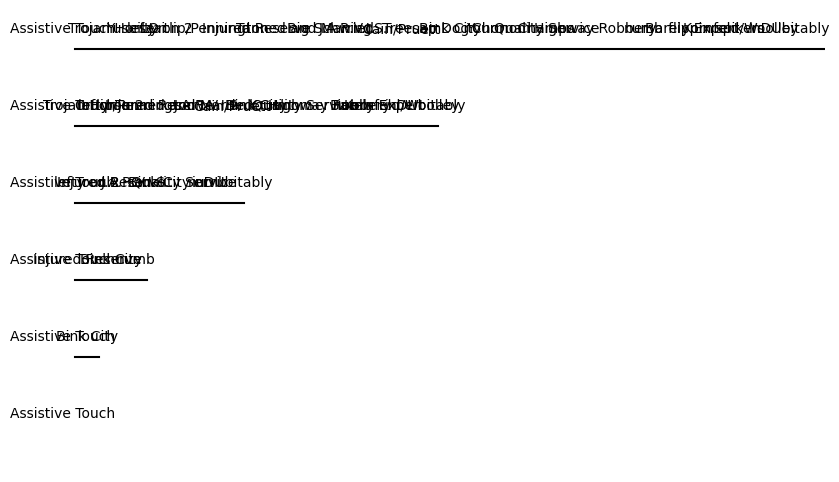

In [48]:
plot_bracket(big_list[1])

In [9]:
test_list=[1,2,4]
temp=test_list.pop(0)
temp

1

In [10]:
test_list

[2, 4]

In [13]:
test=[[] for _ in range(5)]
test

[[], [], [], [], []]

In [15]:
test[0].append(5)
test

[[5, 5], [], [], [], []]

In [16]:
next_key = "64"  # Since the pattern is doubling the previous key
next_value = ['1', '64']  # The second element is always the key itself
for i in range(1, 32):  # Remaining elements are formed by adding/subtracting the index from the second element
    if i % 2 == 0:
        next_value.append(str(int(next_value[1]) - i // 2))
    else:
        next_value.append(str(int(next_value[1]) + i // 2))
next_value

['1',
 '64',
 '64',
 '63',
 '65',
 '62',
 '66',
 '61',
 '67',
 '60',
 '68',
 '59',
 '69',
 '58',
 '70',
 '57',
 '71',
 '56',
 '72',
 '55',
 '73',
 '54',
 '74',
 '53',
 '75',
 '52',
 '76',
 '51',
 '77',
 '50',
 '78',
 '49',
 '79']

In [20]:
([x for x in range(1,5)]+([x for x in range(1,5)][::-1]))*2

[1, 2, 3, 4, 4, 3, 2, 1, 1, 2, 3, 4, 4, 3, 2, 1]

In [44]:
open_pools=create_pools(team_dict,3)

[0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 1, 2, 2, 1, 0]
['Double Clutch', 'Mermaid Sparkle', 'Blessed', 'Finocchi/Model', 'Drawing Dead', 'Iffy', 'Prophecy', 'Incompetence', 'Steak and Eggs', 'Barely Legal', "Mrs. Claus' Favorite Elves", 'Jacob’s the GOAT', 'Drew and Sam', 'JJ Jesuit GRAduates', 'PORKCHOP']


In [45]:
open_pools

[['Double Clutch', 'Iffy', 'Prophecy', 'Jacob’s the GOAT', 'Drew and Sam'],
 ['Mermaid Sparkle',
  'Drawing Dead',
  'Incompetence',
  "Mrs. Claus' Favorite Elves",
  'JJ Jesuit GRAduates'],
 ['Blessed', 'Finocchi/Model', 'Steak and Eggs', 'Barely Legal', 'PORKCHOP']]